# Exploratory Data Analysis (ワードクラウド)

## Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose() # データの転置
data.head()

,20211025_13,20211025_08,20211025_04,20211024_11,20211024_13,20211022_32
's,2,0,3,0,2,1
able,0,1,0,0,0,0
accept,0,0,1,0,0,0
accordingly,0,0,1,0,0,0
activity,0,2,1,0,0,0


In [2]:
# Find the top 10 words used in each article 
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending = False).head(10)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'20211025_13': [('wed', 3),
  ("'s", 2),
  ('cost', 2),
  ('japan', 2),
  ('contract', 2),
  ('time', 2),
  ('association', 2),
  ('industry', 2),
  ('cancel', 2),
  ('pandemic', 2)],
 '20211025_08': [('ask', 3),
  ('infection', 3),
  ('pm', 2),
  ('serve', 2),
  ('certify', 2),
  ('stop', 2),
  ('din', 2),
  ('business', 2),
  ('eatery', 2),
  ('people', 2)],
 '20211025_04': [('restriction', 5),
  ("'s", 3),
  ('october', 3),
  ('moscow', 3),
  ('russia', 3),
  ('impose', 2),
  ('number', 2),
  ('st', 2),
  ('high', 2),
  ('day', 2)],
 '20211024_11': [('new', 2),
  ('singapore', 2),
  ('workplace', 2),
  ('government', 2),
  ('unvaccinated', 2),
  ('people', 2),
  ('negative', 1),
  ('restriction', 1),
  ('exceed', 1),
  ('surge', 1)],
 '20211024_13': [('sumo', 3),
  ('event', 3),
  ('sumida', 3),
  ('say', 2),
  ('division', 2),
  ('hand', 2),
  ('cancel', 2),
  ('hold', 2),
  ("'s", 2),
  ('year', 2)],
 '20211022_32': [('vaccination', 6),
  ('foreigner', 3),
  ('venue', 3),
  ('cou

In [3]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(background_color = "white", colormap = "Dark2", max_font_size = 150, random_state = 42)

In [4]:
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,article
20211025_13,japan's wedding industry is enduring tough tim...
20211025_08,the tokyo metropolitan government has lifted a...
20211025_04,russia's first and second largest cities of mo...
20211024_11,the government of singapore will make vaccina...
20211024_13,around elementary school students took part i...
20211022_32,the tokyo metropolitan government has opened t...


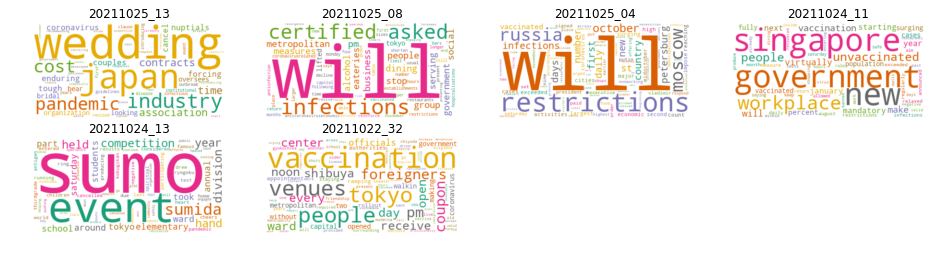

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

for index, article in enumerate(data.columns):
    wc.generate(data_clean.article[article])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.title(data.columns[index])
    
plt.show()

## Number of Words

### Analysis

In [6]:
# Find the number of unique words that each article uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for article in data.columns:
    uniques = data[article].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['article', 'unique_words'])
data_words

,article,unique_words
0,20211025_13,55
1,20211025_08,63
2,20211025_04,88
3,20211024_11,53
4,20211024_13,66
5,20211022_32,83
